In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img_file=cv2.imread("Books/intro.jpg")
#cv2.imshow("Image",img_file)
#cv2.waitKey(0)

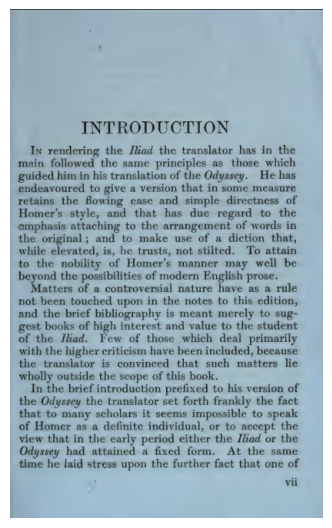

In [5]:
#displaying the image using matplotlib for easier viewing
def display(image):
    img_file=cv2.imread(image)
    height,width= img_file.shape[:2]
    
    dpi=80
    figsize=height/float(dpi),width/float(dpi)
    
    fig=plt.figure(figsize=figsize)
    ax=fig.add_axes([0,0,1,1])
    ax.axis('off')
    
    ax.imshow(img_file,cmap='grey')
    plt.show()
    
display("Books/intro.jpg")

In [7]:
# converting the image to greyscale
def greyscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grey_image=greyscale(img_file)
cv2.imwrite("Books/intro_greyscale.jpg", grey_image)

True

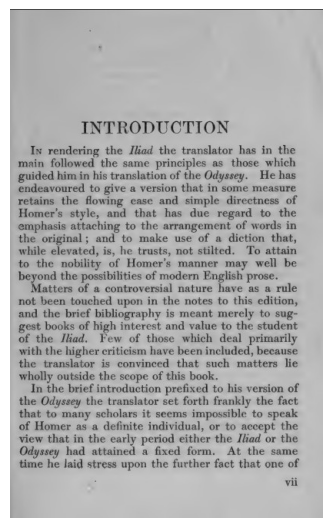

In [9]:
display("Books/intro_greyscale.jpg")

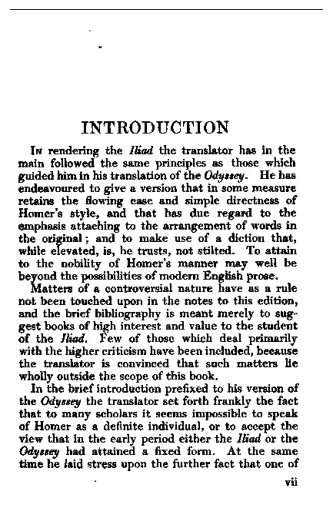

In [83]:
#converting the image to black and white so the text pop-out
thresh, im_bw=cv2.threshold(grey_image, 147, 255, cv2.THRESH_BINARY)
cv2.imwrite("Books/intro_bw.jpg", im_bw)
display("Books/intro_bw.jpg")

In [131]:
#removing noise from the image
def noise_removal(image):
    kernel=np.ones((1,1), np.uint8)
    
    image=cv2.erode(image, kernel, iterations=1)
    #image=cv2.dilate(image,kernel, iterations=1)
    #image=cv2.erode(image, kernel, iterations=1)
    image=cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    #image=cv2.medianBlur(image,3)
    
    return image

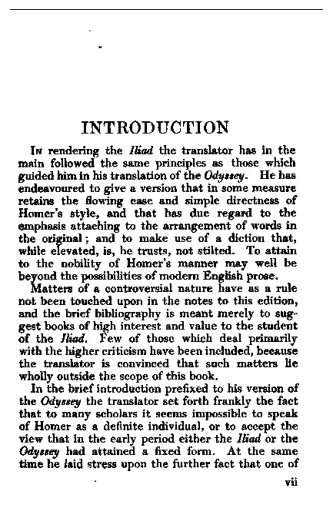

In [132]:
im_wonoise=noise_removal(im_bw)
cv2.imwrite("Books/intro_wonoise.jpg", im_wonoise)
display("Books/intro_wonoise.jpg")

In [189]:
#adjusting font sizes using erosion

def thin_font(image):
    image = cv2.bitwise_not(image)
    kernel= np.ones((2,1), np.uint8)
    
    image=cv2.erode(image, kernel, iterations=1)
    image=cv2.bitwise_not(image)
    return image


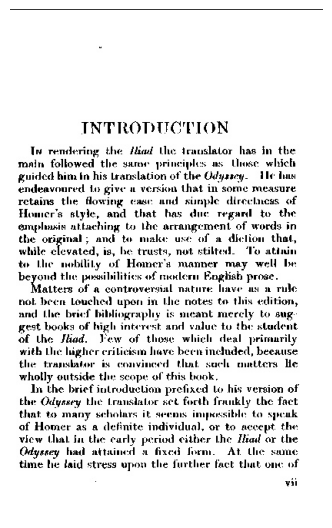

In [190]:
im_eroded=thin_font(im_wonoise)
cv2.imwrite("Books/intro_eroded.jpg", im_eroded)
display("Books/intro_eroded.jpg")

In [194]:
#time to thicken the font using dialation

def thick_font(image):
    kernel= np.ones((2,1), np.uint8)
    image=cv2.bitwise_not(image)
    image=cv2.dilate(image, kernel, iterations=2)
    return image

In [195]:
im_thick=thick_font(im_eroded)
cv2.imwrite("Books/intro_thick.jpg", im_thick)


True

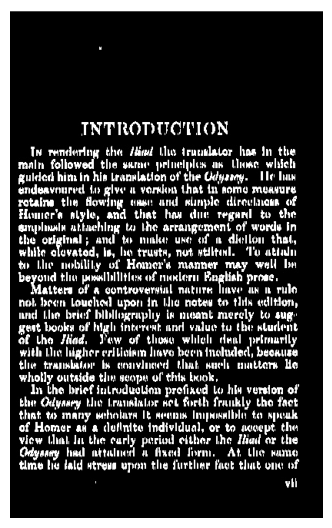

In [196]:
display("Books/intro_thick.jpg")